# Visualization I  
## CartoPy

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://scitools.org.uk/images/cartopy.png" alt="CartoPy" style="height: 200px;"></div>


*This notebook was modified from one developed by Unidata*

## Objectives
1. <a href="#basicfigure">Create a basic figure using CartoPy</a>
1. <a href="#mapfeatures">Add features to maps</a>
1. <a href="#plottingdata">Plot georeferenced data on the figure</a>

## Getting Help with Cartopy

Here are some important resources for learning more about Cartopy and getting help.

- [NCAR Hackathons Data Visualization in Python Guide](https://ncar-hackathons.github.io/visualization)
- [Cartopy documentation](https://scitools.org.uk/cartopy/docs/latest/)
- [Cartopy questions on StackOverflow](https://stackoverflow.com/questions/tagged/cartopy)


<a name="basicfigure"></a>
## 1. Basic CartoPy Plotting

- High level API for dealing with maps
- CartoPy allows you to plot data on a 2D map.
- Support many different map projections
- Support for shapefiles from the GIS world

In [1]:
# Set things up
%matplotlib inline

# Importing CartoPy
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

The simplest plot we can make sets a projection with no parameters. The one below uses the Robinson projection:

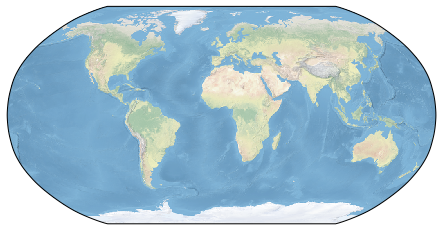

In [2]:
# Works with matplotlib's built-in transform support.
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Sets the extent to cover the whole globe
ax.set_global()

# Adds standard background map
ax.stock_img()

We also have fine-tuned control over the globe used in the projection as well as lots of standard parameters, which depend on individual projections:

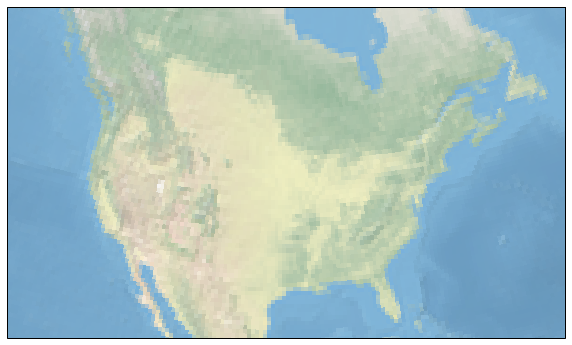

In [3]:
# Set up a globe with a specific radius
globe = ccrs.Globe(semimajor_axis=6371000.)

# Set up a Lambert Conformal projection
proj = ccrs.LambertConformal(standard_parallels=[25.0], globe=globe)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Sets the extent using a lon/lat box
ax.set_extent([-130, -60, 20, 55])

ax.stock_img()

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="mapfeatures"></a>
## 2. Adding feature to CartoPy maps

CartoPy provides a couple helper methods for adding maps to the plot:

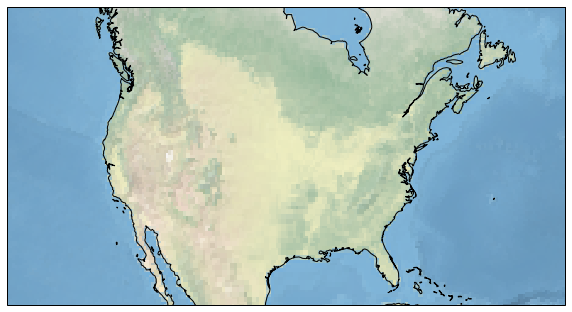

In [4]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.stock_img()

# Specifies the detail level of the map.
# Options are '110m' (default), '50m', and '10m'
ax.coastlines(resolution='50m')

ax.set_extent([-130, -60, 20, 55])

Cartopy also has a lot of built-in support for a variety of map features:

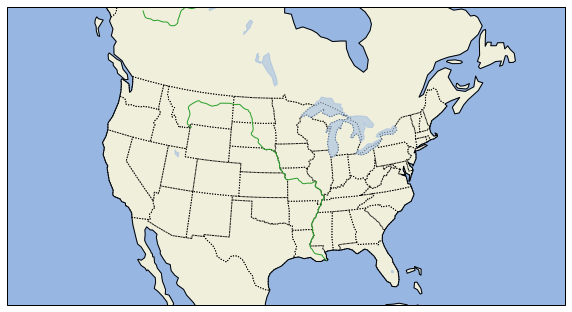

In [5]:
# import cartopy's collection of map features
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Add variety of features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Can also supply matplotlib kwargs
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, edgecolor='tab:green')

ax.set_extent([-130, -60, 20, 55])

The map features are available at several different scales depending on how large the area you are covering is. The scales can be accessed using the `with_scale` method. Natural Earth features are available at 110m, 50m and 10m.

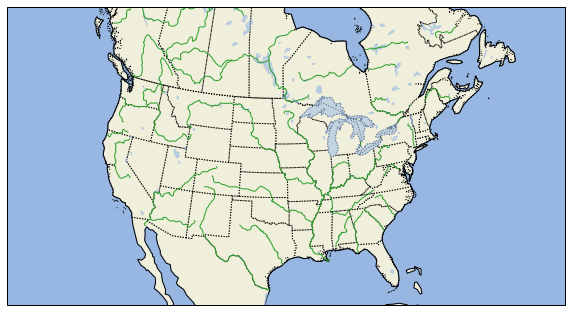

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Add variety of features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Can also supply matplotlib kwargs
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.LAKES.with_scale('50m'), alpha=0.5)
ax.add_feature(cfeature.RIVERS.with_scale('50m'), edgecolor='tab:green')

ax.set_extent([-130, -60, 20, 55])

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="plottingdata"></a>
## 3. Plotting Data

Load a dataset of dissolved oxygen concentration in the thermocline (400-600 m depth).

In [7]:
import xarray as xr
ds = xr.open_dataset('../../datasets/woa2013/woa2013v2-O2-thermocline-ann.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    O2       (lat, lon) float32 ...
    dz       float32 ...
Attributes:
    title:       World Ocean Atlas 2013 version 2
    references:   Garcia H. E., T. P. Boyer, R. A. Locarnini, A. V. Mishonov,...

### Use `xarray`'s hooks to `matplotlib` to create a quick-look plot

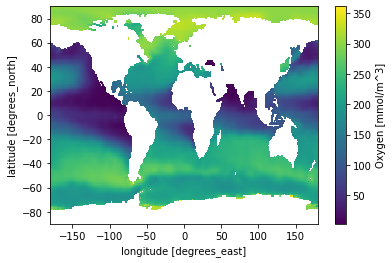

In [8]:
ds.O2.plot();

### Colormap normalization

- Matplotlib includes several [colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).
- Objects that use colormaps by default linearly map the colors in the colormap from data values vmin to vmax.
- [Colormap normalization](https://matplotlib.org/3.1.0/tutorials/colors/colormapnorms.html) provides a means of manipulating the mapping. 

For instance:

In [9]:
import matplotlib.colors as colors
norm = colors.Normalize(vmin=-1, vmax=1.)
norm(0.)

0.5

We can map data to colormaps in a non-linear fashion using other normalizations, for example:

In [10]:
norm = colors.LogNorm(vmin=1e-2, vmax=1e2)
np.array(norm([0.1, 1., 10., 100.]))

array([0.25, 0.5 , 0.75, 1.  ])

### ...back to oxygen
Set contour levels to non-uniform intervals and make the colormap centered at the hypoxic threshold using `DivergingNorm`.

In [11]:
levels = [0, 10, 20,  30, 40, 50, 60, 80, 100, 125, 150, 175, 200, 225, 
          250, 275, 300]

norm = colors.DivergingNorm(vmin=levels[0], vmax=levels[-1], vcenter=60.)

Add a cyclic point to accomodate the periodic domain.

In [12]:
from cartopy.util import add_cyclic_point
field, lon = add_cyclic_point(ds.O2, coord=ds.lon)
lat = ds.lat

### Putting it all together...

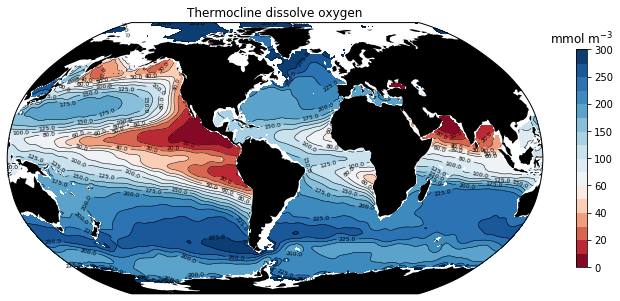

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))

# filled contours
cf = ax.contourf(lon, lat, field, levels=levels, norm=norm, cmap='RdBu',
                 transform=ccrs.PlateCarree());

# contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5,
                transform=ccrs.PlateCarree())

# add contour labels
lb = plt.clabel(cs, fontsize=6, inline=True, fmt='%r');

# land
land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('mmol m$^{-3}$')
ax.set_title('Thermocline dissolve oxygen');

### Exercise
* Create a map, on a Robinson Projection of the Jan 2016 SST field from the dataset loaded below.
* Add colored and labled contours using a linear colormap. Pick a [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) that works well for SST.

In [14]:
ds = xr.open_dataset('../../datasets/sst/NOAA_NCDC_ERSST_v3b_SST-2016.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2016-01-15 2016-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

Here's a quick look plot:

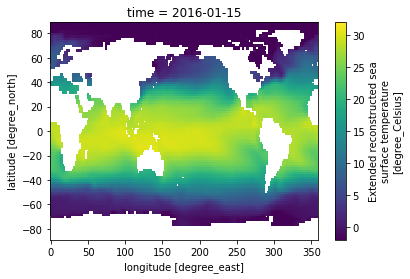

In [15]:
ds.sst.sel(time='2016-01').plot(vmin=-2, vmax=32)

In [16]:
# YOUR CODE GOES HERE

#### Solution

In [17]:
# %load solutions/map.py

<a href="#top">Top</a>
<hr style="height:2px;">